In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import nltk
import nltk as nk
from nltk import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.corpus import stopwords
import re


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier


# Accessing Files and Folders
# import os

# Data Collection and Preperation

In [ ]:
# json_data = open("data.json").read()
# data = json.loads(json_data)

# pd.read_json(open("data.json", "r", encoding="utf8"))
# basePath = os.path.dirname(os.path.abspath("data.json"))
# df = pd.read_json(basePath + "/data.json", orient = 'records', dtype={"A":str, "B":list})

data_df = pd.read_json('/home/airwolf/Data science Projects/Data Science Lab/data_115k.json', lines=True)


In [ ]:
data_115k = data_df
data_115k

## Data Exploration 

####  Which features are available in the dataset

In [ ]:
print(data_115k.columns.values)

In [ ]:
# preview the data
data_115k.head()

In [ ]:
# preview the tail
data_115k.tail()


#### the distribution of numerical feature values across the samples

In [ ]:
data_115k.describe()

#### papers taken from year 25% are of 2002....... 50%=,  75%=.,........... max=....... min=..........

In [ ]:
data_115k.describe(include=np.object)

### for a data of data_20k
total venues 19403 and distinct venue are 3630

total reference are 12704 and distinct references are 11733

authors = 20000 and distinct 19903

distinct publishers = 687 and total = 20k

## Dealing with missing values
####  drop the rows where NaN values exist

In [ ]:
data_115k.dropna(axis=0,how="any",inplace=True)
# data = data.fillna('') # replace missing values with '' as in the previous lesson

#### Applying Basic statistics again after drop the null values

In [ ]:
data_115k.describe()

In [ ]:
data_115k.describe(include=np.object)

# Preprocessing 

## Data Cleaning, Grouping and Pruning

In [ ]:
# get tokenized form of the abstract(tokenization at word level in a sentence) and the original abstract.
def Tokenized_and_OriginalAbstract(data):
     """
        Input data: String
        
        return: tokenized words at sentence level and other is a String 
    """
    x = lambda x:x["InvertedIndex"].keys()
    tokenized_abstract = [list(x(entry)) for entry in data] # tokeized form of the abstract content
    original_abstract = [" ".join(entry) for entry in tokenized_abstract]
    return (tokenized_abstract,original_abstract)


# get venues from the dataset
def Venues(data):
    """
        Input data: String
        
        return: venues as a string 
    """
    x = lambda x:x["raw"]
    return [x(entry) for entry in data_115k["venue"]]

# Authors and Field of Study(Keywords)
def Author_and_FOS_Values(data):
    """
        Input data: String
        
        return: authors and FOS as string 
    """
    filtered_data = []
    for entry in data:
        valueInEntry = []
        for value in entry:
            valueInEntry.append(value["name"])
#       filtered_data.append(valueInEntry)
        filtered_data.append(", ".join(valueInEntry))
    return filtered_data     

In [ ]:
authors_115k = Author_and_FOS_Values(data_115k["authors"]) # get Author Names
keywords_115k = Author_and_FOS_Values(data_115k["fos"]) # get Field of Study 
abstract_115k = Tokenized_and_OriginalAbstract(data_115k["indexed_abstract"])
title_115k = data_115k["title"]
year_115k = data_115k["year"]
venue_115k = Venues(data_115k["venue"])

In [ ]:
newData = pd.DataFrame(data=list(zip(authors_115k,keywords_115k,abstract_115k[1],title_115k,year_115k,venue_115k)),columns=["authors","fos","abstract","title","year","venue"])
newData.to_csv("filteredData_55k.csv",index=False)

## Basic Statistics on the subset of dataset that is normailzed

In [1]:
data = pd.read_csv("filteredData_55k.csv")
# np.sum(data.isnull(),axis=0) # whether all values are not a NaN

NameError: name 'pd' is not defined

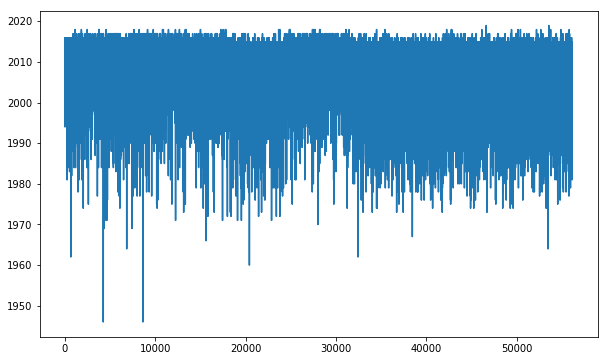

In [172]:
plt.figure(figsize=(10,6))
data['year'].plot(linewidth=1.5);


(array([2.0000e+00, 1.0000e+00, 6.0000e+00, 5.6000e+01, 2.1200e+02,
        6.3400e+02, 3.2750e+03, 8.7270e+03, 1.8509e+04, 2.4731e+04]),
 array([1946. , 1953.3, 1960.6, 1967.9, 1975.2, 1982.5, 1989.8, 1997.1,
        2004.4, 2011.7, 2019. ]),
 <a list of 10 Patch objects>)

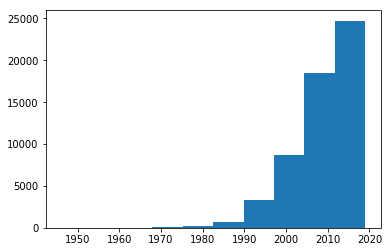

In [8]:
plt.hist(year) # distribution of data over the year.

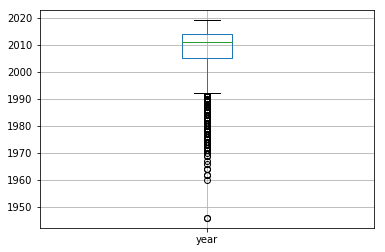

In [13]:
data.boxplot()

In [478]:
data.shape

(56153, 6)

####  As there are 56153 entries for research paper in total so we can see that number of unique authors are less which means some authors, fos, abstract and venues are repeated.

In [13]:
data.nunique()

authors     54737
fos         55929
abstract    56148
title       56152
year           57
venue        5312
dtype: int64

In [12]:
data[data.duplicated(subset = "fos",keep=False)].sort_values("fos")

,authors,fos,abstract,title,year,venue
319,Heinz Schweppe,"Art, Performance art",Es wird eine Ubersicht uber den Stand der Entw...,"Hardwareunterstützung für Datenbanken in Büro,...",1985,BTW
5119,"Keno März, Alfred M. Franz, Bram Stieltjes, Al...","Art, Performance art",Leberpunktionen sind ein elementares Werkzeug ...,Navigierte ultraschallgeführte Leberpunktion m...,2013,Workshops Bildverarbeitung fur die Medizin: Al...
18703,"Christian Münzenmayer, Steffen Mühldorfer, Bri...","Art, Performance art",In diesem Beitrag stellen wir zwei neue Verfah...,Farbtexturbasierte optische Biopsie auf hochau...,2003,Bildverarbeitung f&uuml;r die Medizin
40577,Wolfgang Koops,"Art, Performance art",In dem vorliegenden Beitrag werden zwei Verfah...,Untersuchung expansiver Techniken des Verkehrs...,1989,"Messung, Modellierung und Bewertung von Rechen..."
42293,"Matthias Pleßow, M. Pocher","Art, Performance art",Zur Beschreibung der Struktur oder des Verhalt...,Intelligente Editoren — ein innovatives Konzep...,1998,GI Jahrestagung
42450,"Manfred Warzawa, Erwin Kneuer","Art, Performance art",Die unter dem Arbeitstitel PEARL 90 gefuhrte D...,Neue Implementierungswege mit PEARL 90,1990,PEARL 90 Proceedings of the Workshop über Real...
42504,"Mehran Mahvash, Roy König, Lucas Scheef, Horst...","Art, Performance art",Viele epileptogene Lasionen sind in der Nachba...,Multimodale Neuronavigation in der resektiven ...,2004,Bildverarbeitung f&uuml;r die Medizin
51800,"Christian Bräuer-Burchardt, Klaus Voss","Art, Performance art",Es wird ein monokulares Verfahren zur Rekonstr...,Winkelbestimmung mittels Fluchtpunkten in proj...,2000,"Mustererkennung 2000, 22. DAGM-Symposium"
16200,"Katharina Greiner, Jan Egger, Jan Egger, Stefa...","Art, Performance art",In diesem Beitrag werden Active Appearance Mod...,Segmentierung von Aortenaneurysmen in CTA-Bild...,2008,Bildverarbeitung f&uuml;r die Medizin
47230,"Martin Haimerl, Jörg Moldenhauer, Ulrich Mende...","Art, Performance art",Fur die Aufbereitung von 3D-Ultraschalldaten w...,Merkmalsinduzierte Aufbereitung medizinischer ...,2002,Bildverarbeitung f&uuml;r die Medizin


#### which year had which papers at which venues

In [473]:
data.groupby(by=["year","venue"]).size()[-500:]

year  venue                                                                        
2016  HARMONY SEARCH ALGORITHM                                                          1
      Health Informatics Journal                                                        2
      Human-Computer Interaction                                                        1
      ICHSA                                                                            17
      IEEE ACM Transactions on Networking                                               2
      IEEE Communications Letters                                                       1
      IEEE Internet Computing                                                           1
      IEEE Journal of Biomedical and Health Informatics                                 2
      IEEE Journal of Selected Topics in Signal Processing                              1
      IEEE Journal on Selected Areas in Communications                                  1
      IEEE Syste

In [70]:
def NumberOfPapersPublishedInVenue_or_FOS(fromTime, toTime):
    """
        Input fromTime and toTime: Number Int
        
        return: text string with its numberic count
    """
    time = data["year"].apply(lambda x: x > fromTime and x < toTime )
    return data["venue"][time].value_counts()[:20]

In [71]:
NumberOfPapersPublishedInVenue_or_FOS(1900,2019)

Lecture Notes in Computer Science                                                 956
international conference on human-computer interaction                            407
international conference on computational science and its applications            376
international symposium on circuits and systems                                   369
international conference on intelligent computing                                 307
international symposium on neural networks                                        301
international conference on artificial neural networks                            295
medical image computing and computer assisted intervention                        282
international conference on neural information processing                         281
international conference on human computer interaction                            256
european conference on computer vision                                            256
international conference on computational science     

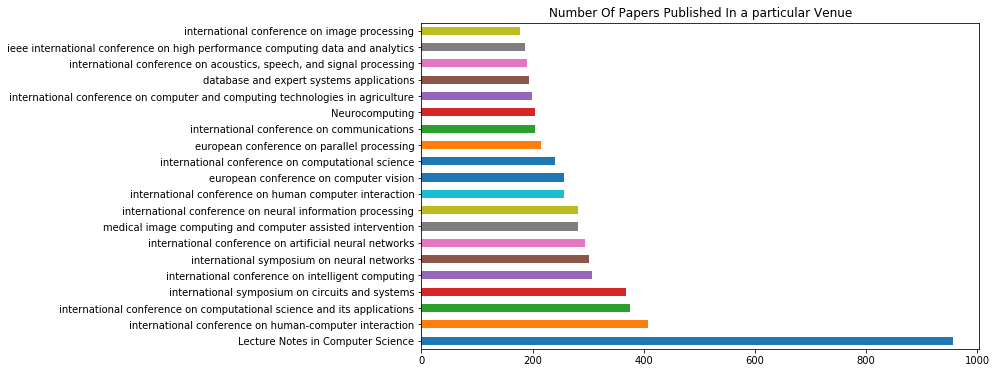

In [134]:
plt.figure(figsize=(10,6))
NumberOfPapersPublishedInVenue_or_FOS(1900,2019).plot(kind="barh",title="Number Of Papers Published In a particular Venue") #plot

####  where have the authors published its and when and author with most number of papers

In [ ]:
data["authors"].value_counts()[:20]

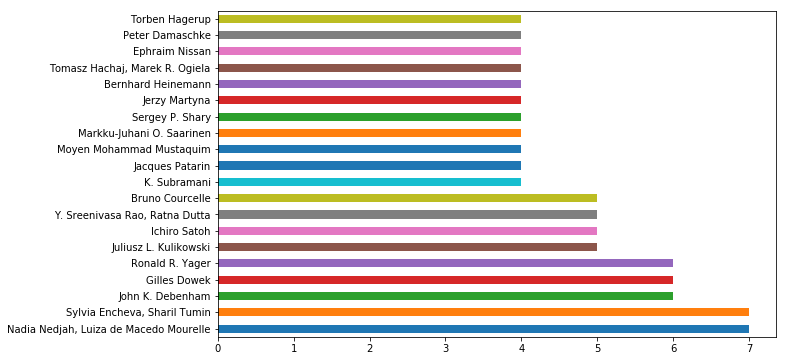

In [133]:
plt.figure(figsize=(10,6))
data["authors"].value_counts()[:20].plot(kind="barh") #plot
## another way to do this
# data.groupby(by="authors").size().sort_values(ascending=False)

#### when the papers were published and in which venue by people who were most active

In [148]:
mask = np.in1d(data["authors"],["John K. Debenham"]) # when the papers were published and in which venue by people who were most active
entries = data.index[mask]
data.iloc[entries]
## or in one line
## data.iloc[data.index[data["authors"] == "John K. Debenham"].tolist()]

,authors,fos,abstract,title,year,venue
6945,John K. Debenham,"Computer science, Business process, Nonmarket ...",A market is in equilibrium if there no opportu...,Identifying Arbitrage Opportunities in E-markets,2002,electronic commerce and web technologies
15138,John K. Debenham,"Knowledge base, Database, Knowledge engineerin...",Knowledge engineering has developed fine tools...,A Lesson for Software Engineering from Knowled...,2003,database and expert systems applications
21989,John K. Debenham,"Agent architecture, Business process, Business...",Emergent processes are business whose executio...,Managing Emergent Processes with Information-B...,2013,electronic government and the information syst...
33295,John K. Debenham,"Data mining, Database, Knowledge base, Expert ...",The problem of maintaining a knowledge base is...,Knowledge Base Maintenance through Knowledge R...,2001,database and expert systems applications
38758,John K. Debenham,"Belief revision, Welfare economics, Impression...","A bargaining agent exchanges proposals, suppor...",A Bargaining Agent aims to ‘Play Fair’,2004,International Conference on Innovative Techniq...
54191,John K. Debenham,"Windows Workflow Foundation, World Wide Web, W...",A knowledge-based system acts as an intelligen...,A Knowledge-Based System for Workflow Manageme...,1997,australian joint conference on artificial inte...


In [145]:
mask = np.in1d(data["authors"],["Nadia Nedjah, Luiza de Macedo Mourelle"])  # when the papers were published and in which venue
entries = data.index[mask]
# data.iloc[entries]

#### Most papers published in a particular field of study

In [153]:
data["fos"].value_counts()[:30]

Philosophy, Performance art                                    46
Art, Performance art                                           34
History, Performance art                                       22
Operating system, Computer science                             20
Performance art, Art                                           14
Performance art, History                                       12
Computer science, Knowledge management, Performance art         6
Operating system, Art                                           5
Machine learning, Artificial intelligence, Computer science     4
Knowledge management, Computer science                          4
Simulation, Computer science                                    3
Management science, Computer science                            3
Electronic engineering, Engineering, Performance art            3
Computer science, Internet privacy                              3
Theoretical computer science, Computer science                  3
Mathematic

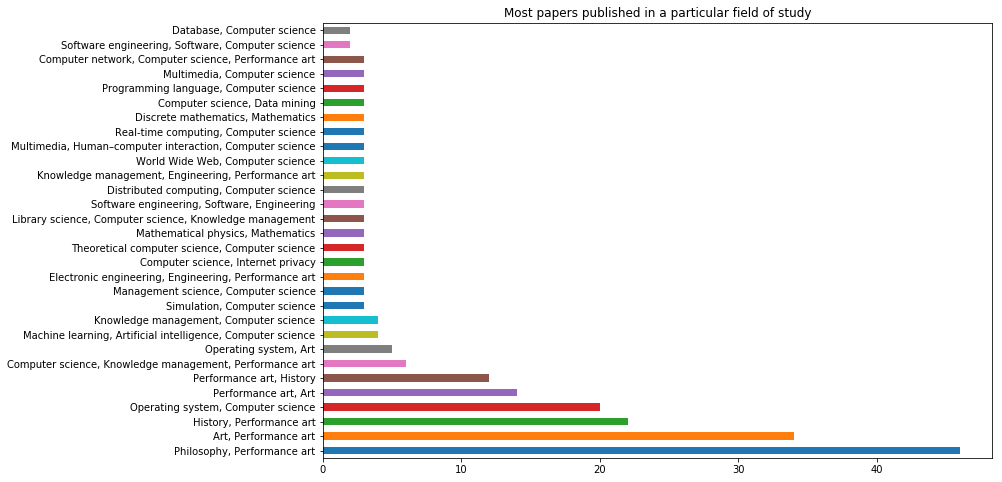

In [144]:
plt.figure(figsize=(12,8))
data["fos"].value_counts()[:30].plot(kind="barh",title="Most papers published in a particular field of study")

#### The Paper published in the field of Philosophy, Performance art have which type of venues

In [169]:
philosophy = (data["fos"] == "Philosophy, Performance art")
philo = data[philosophy]
philo["venue"].value_counts()[:5]

Bildverarbeitung f&uuml;r die Medizin                                                4
german workshop on artificial intelligence                                           3
symposium simulationstechnik                                                         3
Handbuch Netzwerkforschung                                                           2
tat parallele datenverarbeitung mit dem transputer, . transputer-anwender-treffen    2
Name: venue, dtype: int64

## Data preperation - Feature Extraction

In [22]:
operational_Document = data[["title","abstract","fos","venue"]]
operational_Vocab = data[["title","abstract"]]
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
REMOVING_NUMBERS = re.compile("(^|\W)\d+")
STOPWORDS = set(stopwords.words('english'))

In [453]:
document_Content = [" ".join(entry) for entry in operational_Document.values.tolist()]
vocab_Content = [" ".join(entry) for entry in operational_vocab.values.tolist()]

In [16]:
def Nltk2Word_And_Tag(nltk_tag):
    """
        Input text: a string
        
        return: string tag such as 'a','v','n','r'
    """
        
    if nltk_tag.startswith('J'):
        return wordnet.wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.wordnet.ADV
    else:        
        return None
    
def Lemmatize_Sentence(sentence):
    """
        Input text: a string
        
        return: lemmatized string
    """
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    w_n_tagged = map(lambda x: (x[0], Nltk2Word_And_Tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in w_n_tagged:
        if tag is None: 
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(res_words)

def Stem_Sentence(sentence):
    """
        Input text: a string
        
        Description: Can be applied for varying the analysis of Classifier
        
        return: stemmed string
    """
    tokenize_words = nltk.word_tokenize(sentence)
    stem_sents = [stemmer.stem(word) for word in tokenize_word]
    return " ".join(stem_sents)

def Length_Words_Disapproved(sentence,length):
    """
        Input text: a string and int for defining the limit on the length of the words that will be allowed
        
        return: modified text string
    """
    tokenize_words = nltk.word_tokenize(sentence)
    sent = list(filter(lambda x: len(x) > length,tokenize_words))
    return " ".join(sent) 

def clean_text(text,flag):
    """
        Input text: a string and flag for stemming on the current text
        
        return: modified text string which is lower-cased
    """
    text = text.lower() # lowercase text
    text = REMOVING_NUMBERS.sub(" ", text) # removes the occurences of number such as 2019 or 3valued or 21
    text = REPLACE_BY_SPACE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text 
    if(flag):
        text = Stem_Sentence(text)
    
    return Lemmatize_Sentence(Length_Words_Disapproved(text,3))


In [17]:
lemmatized_abstract = data["abstract"].apply(lambda x:clean_text(x,0))
lemmatized_title = data["title"].apply(lambda x:clean_text(x,0))
lemmatized_fos = data["fos"].apply(lambda x:clean_text(x,0))

In [493]:
data

,authors,fos,abstract,title,year,venue
0,"Fabio Martinelli, Ilaria Matteucci, Andrea Sar...","Trusted Computing, Exploit, Mobile device, Com...","Both in the cloud and mobile environments, a l...",Remote Policy Enforcement for Trusted Applicat...,2013,international conference on trusted systems
1,"Emdad Hossain, Girija Chetty","Biometrics, Gait, Computer science, Computer v...",In this paper we propose a novel multi-view fe...,Gait based human identity recognition from mul...,2012,international conference on algorithms and arc...
2,"Pavel Kordík, Václav Křemen, Lenka Lhotska","Pattern recognition, Artificial intelligence, ...",Complex fractionated atrial electrograms (CFAE...,The GAME Algorithm Applied to Complex Fraction...,2008,international conference on artificial neural ...
3,"Sunzeng Cai, Haiping Jiang, Hua Qian, Weidong ...","Computer science, Bit error rate, Computer net...","In vehicle communications, channel characteris...",Pilots Aided Channel Estimation for Doubly Sel...,2013,international wireless internet conference
4,"Brendan J. Florio, Michael Vynnycky, Sarah L. ...","Mathematical optimization, Mathematics, Contin...","We develop a coupled thermomechanical model, t...",Mould-taper asymptotics and air gap formation ...,2015,Applied Mathematics and Computation
5,"Lucas Rodrigo Raso Mattos, Vijayaraghavan Vara...","Data security, Secrecy, Database, Encryption, ...",With the increasing popularity of social netwo...,Data Protection and Privacy Preservation Using...,2012,International Conference on Security in Comput...
6,"Milica Milutinovic, Vincent Naessens, Bart De ...","Real-time computing, Computer network, Compute...","In this research, we designed a privacy-preser...",Privacy-preserving scheduling mechanism for eh...,2012,international conference on communications
7,"Christos Kalloniatis, Petros Belsis, Evangelia...","Systems engineering, Data mining, Privacy by D...",Designing privacy-aware systems gains much att...,Applying Soft Computing Technologies for Imple...,2012,conference on advanced information systems eng...
8,Chun-Ching Chen,"Computer science, Multimedia, Human–computer i...","At limited area of smartphone display, it is c...",User Recognition and Preference of App Icon St...,2015,international conference on human-computer int...
9,"Matilde Santos, Sebastián Dormido, A.P. de Mad...","Fuzzy electronics, Computer science, Adaptive ...",Fuzzy Control provides a good support to trans...,Tuning Fuzzy Logic Controllers by Classical Te...,1994,computer aided systems theory


# Analysis

### Building Vocabulary

In [43]:
vocab = nltk.word_tokenize(" ".join([" ".join(entry) for entry in np.column_stack((lemmatized_title,lemmatized_abstract)).tolist()]))
# Finding most common terms in context
fdist = FreqDist(vocab)
words = fdist.most_common(4000)
vocabulary_terms = []

for word_tuple in words:
    vocabulary_terms.append(word_tuple[0])


### Building Documents

In [44]:
document = [" ".join(entry) for entry in np.column_stack((lemmatized_title,lemmatized_abstract,lemmatized_fos)).tolist()]

### TF-IDF Vectorizer using Vocabulary and Document

In [45]:
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(vocabulary_terms)
mat = vectorizer.transform(document)

In [46]:
TFIDF = pd.DataFrame(mat.todense(),columns = vectorizer.get_feature_names())
TFIDF

,ability,able,abnormal,absence,absolute,abstract,abstraction,academia,academic,accelerate,...,would,write,wrong,wsns,xray,year,yield,young,zero,zone
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.093250,0.0,0.0,0.0,0.000000
8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
9,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


### Feature Extraction using Train Test Split

In [47]:
y_labels = data["venue"].tolist()
X_train, X_test, y_train, y_test = train_test_split(TFIDF, y_labels, test_size=0.20, random_state=30)

In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print(clf.predict(X_test[1:10]))
clf.score(X_test,y_test)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
print(clf.predict(list(np.arange(791).reshape(1,791))))
clf.score(X_test,y_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
# print(clf.feature_importances_)
print(clf.predict(list(np.arange(791).reshape(1,791))))
clf.score(X_test,y_test)

## Classifier Training and Evaluation

### MultinomialNaiveBayes Classifer 

In [87]:
classifier_mul = MultinomialNB().fit(X_train,y_train)
classifier_mul.score(X_test,y_test)

0.8409703504043127

### Decision Tree Classifier

In [88]:
classifier_dt = DecisionTreeClassifier().fit(X_train,y_train)
classifier_dt.score(X_test,y_test)

0.7466307277628033

### Using Cross Validation KFold and RepeatedKFold

In [91]:
classifier_Multinomial = MultinomialNB()
classifier_LogisticRegression = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
classifier_RandomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
classifier_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

kf = KFold(n_splits=10)
random_state = 300
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=random_state)

scoring = ['precision_macro', 'recall_macro','accuracy','f1_macro']
scores = cross_validate(classifier_Multinomial, cfd, y_labels, cv=rkf,scoring=scoring)


### Accuracy, Precision, Recall and F1_Score

In [92]:
print("Accuracy : ",np.average(scores['test_accuracy']))
print("Precision : ",np.average(scores['test_precision_macro']))
print("Recall : ",np.average(scores['test_recall_macro']))
print("F1_macro : ",np.average(scores['test_f1_macro']))

Accuracy :  0.8092919537401576
Precision :  0.8107667287161611
Recall :  0.8083990194991679
F1_macro :  0.8076070736175952
